<a href="https://colab.research.google.com/github/Yulia-Kryukova-1201/scientific-research-seminar/blob/main/Linear-regression-hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **В качестве домашнего задания вам предстоит проверить некоторые гипотезы из существующего исследования о террактах во всем мире и что на них влияет:**

**Slav, Maxim; Smyslovskikh, Elena; Novikov, Vladimir; Kolesnikov, Igor; Korotayev, Andrey, 2021**  
[https://doi.org/10.7910/DVN/M4F0CU](https://doi.org/10.7910/DVN/M4F0CU)

**Deprivation, Instability, and Propensity to Attack: How Urbanization Influences Terrorism**



##### Информация для каждого наблюдения в массиве данных:

| **Переменная**                | **Описание**                                                                                                           |
|-------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| `c_names`                     | Название государства                                                                                                 |
| `year`                        | Год                                                                                                                   |
| `n_terror_attack`             | Количество терактов за год                                                                                           |
| `nkill`                       | Количество жертв в терактах за год                                                                                   |
| `share_urban_population_UN`   | Доля городского населения по данным ООН                                                                              |
| `population_UN`               | Население по данным ООН                                                                                              |
| `gdp_per_capita_PPP_WB`       | ВВП на душу населения (скорректированный по ППС, данные Всемирного банка)                                            |
| `p_polity_2_2`                | Совокупный индекс Polity 4                                                                                           |
| `epr_discriminated`           | Доля населения, подвергающаяся активной дискриминации с целью исключения из политической власти (0 - нет такой группы)|
| `occupied`                    | Бинарная переменная (0 - регион теракта не находится в оккупации, 1 - присутствует оккупация)                         |
| `war`                         | Бинарная переменная (1 - страна теракта не находится в оккупации, 0 - в государстве идет война)                      |
| `fh_status_sum`               | Совокупный индекс свободы государства (1 - максимальная свобода, 10 - минимальная свобода)                           |
| `state_capacity`              | Индекс государственной состоятельности (минимальное значение -4)                                                    |
| `femaleLF`                    | Доля экономически активного женского населения                                                                       |
| `urb_pop_vigintile`           | Распределение по группам (20 групп) согласно пропорциям городского населения                                         |


In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # регрессия
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt # визуализация
import seaborn as sns

# оценка регрессии
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro, probplot

In [48]:
from google.colab import files

uploaded = files.upload()


Saving ter_urb_data.csv to ter_urb_data (3).csv


In [49]:
df = pd.read_csv('ter_urb_data.csv')


**ЗАДАНИЕ: Есть ли отсутствующие (пропущенные) данные? Если да, то в какой колонке их больше всего? Удалите все пропущенные значения из датафрейма с помощью dropna**

---



In [28]:
df.isna().sum() #просмотр пропусков

,0
Unnamed: 0,0
c_names,94
year,94
n_terror_attack,10925
n_terror_attack_normalized,11376
nkill,10925
share_urban_population_UN,6547
population_UN,6547
gdp_per_capita_PPP_WB,11922
p_polity_2_2,12233


In [29]:
mx=max(df.isna().sum())
print(mx)

16121


Таким образом, по фреймам 28 и 29 можно заметить, что больше всего пропусков в данных в колонке "femaleLF".

In [37]:
df = df.dropna()

In [51]:
print(df[["gdp_per_capita_PPP_WB", "n_terror_attack", "epr_discriminated"]].describe())

       gdp_per_capita_PPP_WB  n_terror_attack  epr_discriminated
count            8612.000000      9609.000000       10073.000000
mean            14166.671349        17.632636           0.050139
std             17754.318854       110.328669           0.140071
min               256.166300         0.000000           0.000000
25%              2874.419500         0.000000           0.000000
50%              7437.643500         0.000000           0.000000
75%             18311.237253         2.000000           0.016000
max            187942.900000      3774.000000           0.980000


**ЗАДАНИЕ: Визуализация взаимосвязей между переменными**

---



Постройте две диаграммы рассеяния для анализа взаимосвязи между следующими парами переменных:

***Диаграмма 1:***

***Ось X:*** gdp_per_capita_PPP_WB (ВВП на душу населения по данным Всемирного банка, скорректированный по паритету покупательной способности).

***Ось Y:*** n_terror_attack (количество террористических атак за год).


***Диаграмма 2:***

***Ось X:*** epr_discriminated (доля населения, подвергающаяся активной дискриминации).

***Ось Y: ***n_terror_attack (количество террористических атак за год).



In [66]:
df1=df[["gdp_per_capita_PPP_WB", "n_terror_attack", "epr_discriminated", "femaleLF"]].dropna()

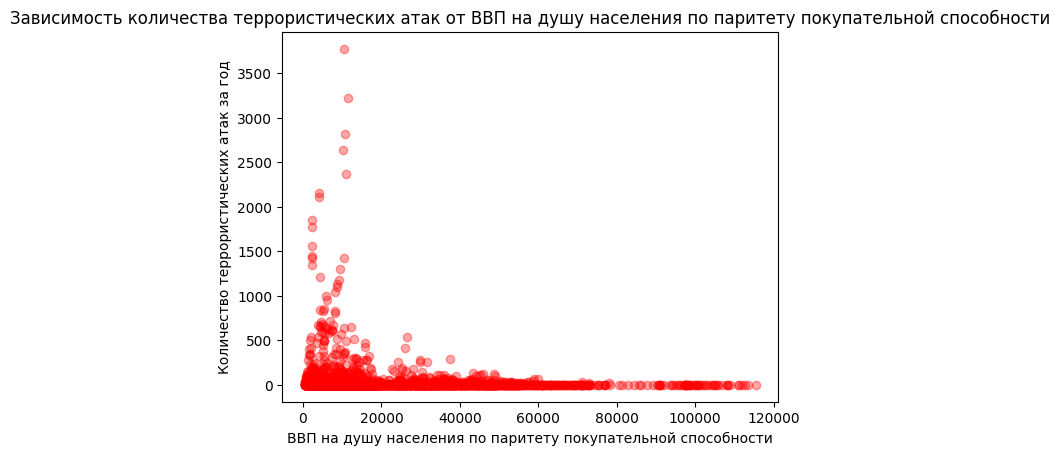

In [67]:
# Диаграмма 1

plt.scatter(df1["gdp_per_capita_PPP_WB"], df1["n_terror_attack"], color='red', alpha=0.35)
plt.title('Зависимость количества террористических атак от ВВП на душу населения по паритету покупательной способности')
plt.xlabel('ВВП на душу населения по паритету покупательной способности')
plt.ylabel('Количество террористических атак за год')
plt.show()

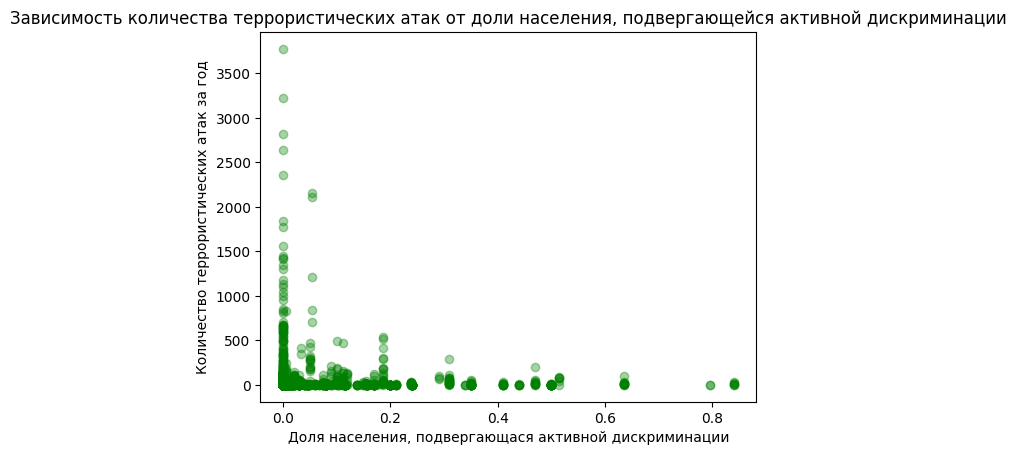

In [68]:
# Диаграмма 2

plt.scatter(df1["epr_discriminated"], df1["n_terror_attack"], color='green', alpha=0.35)
plt.title('Зависимость количества террористических атак от доли населения, подвергающейся активной дискриминации')
plt.xlabel('Доля населения, подвергающася активной дискриминации')
plt.ylabel('Количество террористических атак за год')
plt.show()

## Проверьте с помощью линейной регрессии некоторые гипотезы:
- Чем меньше ВВП на душу населения в государстве, тем больше террактов в год происходит в стране
- Чем больше женщины включены в экономику, тем меньше террактов в год происходит в стране


 **ЗАДАНИЕ: Постройте модель регрессии, используя следующие переменные. Укажите, есть ли между переменными линейная зависимость? Попробуйте проинтерпретировать результаты, как было сделано на семинаре**

*** Зависимая переменная: ***
 `n_terror_attack` - количество террактов в год

***Независимые переменные: ***
  *  * ВВП на душу населения (скорректированный по ППС, данные Всемирного банкa `gdp_per_capita_PPP_WB `
  



In [69]:
X = df1['gdp_per_capita_PPP_WB']
Y = df1['n_terror_attack']
X = sm.add_constant(X, prepend=False)

In [70]:
model = sm.OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        n_terror_attack   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     16.59
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           4.72e-05
Time:                        21:10:38   Log-Likelihood:                -27454.
No. Observations:                4255   AIC:                         5.491e+04
Df Residuals:                    4253   BIC:                         5.492e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
gdp_per_capita_PPP_WB    -0.00

**Интерпретация регрессионной модели**

Введём нулевую и альтернативную гипотезы

Н1: Чем больше ВВП на душу населения по паритетц покупательнй способности, тем меньше количество террористических актов происходит за год (связь отрицательная, поскольку чем выше экономическое благосостояние страны, тем выше уровень жизни, уровень занятости и доступ к базовым услугам, что снижает уровень социального недовольства и радикализации населения)

Pi-value: 0.000 --> Принимаем Н1

Рост ВВП (х) снижает количество террористических атак в среднем на 0.005 при прочих равных условиях

Коэффициент детерминации: R-squared = 0.004

In [64]:
res.resid

,0
0,47.729674
1,38.163656
2,66.022283
3,121.908072
4,78.326451
...,...
18789,-27.655463
18790,-27.559777
18791,-27.445046
18792,-27.333735


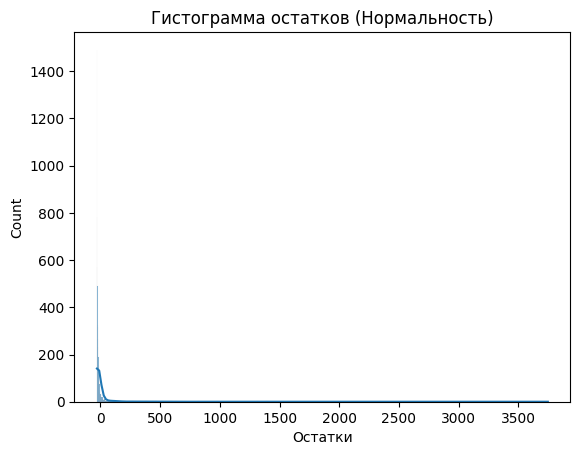

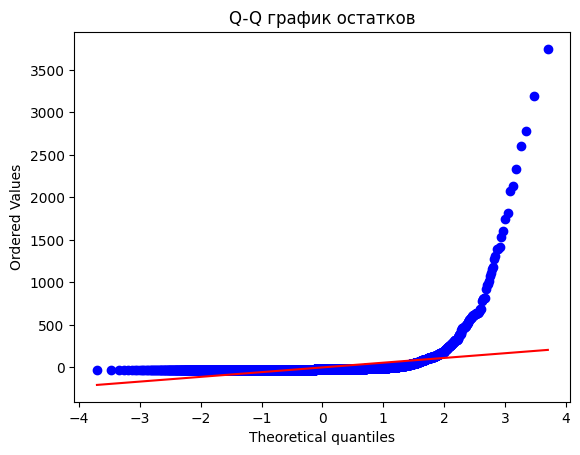

In [65]:
residuals = res.resid
sns.histplot(residuals, kde=True)
plt.title("Гистограмма остатков (Нормальность)")
plt.xlabel("Остатки")
plt.show()

probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q график остатков")
plt.show()

**ЗАДАНИЕ: Чему равен R-squared модели?**

In [77]:
df1['n_terror_attack'].corr(df1['gdp_per_capita_PPP_WB']) ** 2

0.003886010679885886

**ЗАДАНИЕ: Постройте модель регрессии, используя следующие переменные. Укажите, есть ли между переменными линейная зависимость? Попробуйте проинтерпретировать результаты, как было сделано на семинаре**

*** Зависимая переменная: ***
 `n_terror_attack` - количество террактов в год

***Независимые переменные: ***
  * Доля экономически активного женского населения `femaleLF`

In [71]:
X = df1['femaleLF']
Y = df1['n_terror_attack']
X = sm.add_constant(X, prepend=False)

In [72]:
model = sm.OLS(Y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        n_terror_attack   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           3.85e-40
Time:                        21:11:20   Log-Likelihood:                -27374.
No. Observations:                4255   AIC:                         5.475e+04
Df Residuals:                    4253   BIC:                         5.477e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
femaleLF      -1.9146      0.143    -13.401      0.0

In [74]:
res.resid

,0
18,13.924494
19,6.618162
20,14.445259
21,-17.353704
22,38.635540
...,...
6318,0.080449
6319,-1.462702
6320,-24.933531
6321,-44.646038


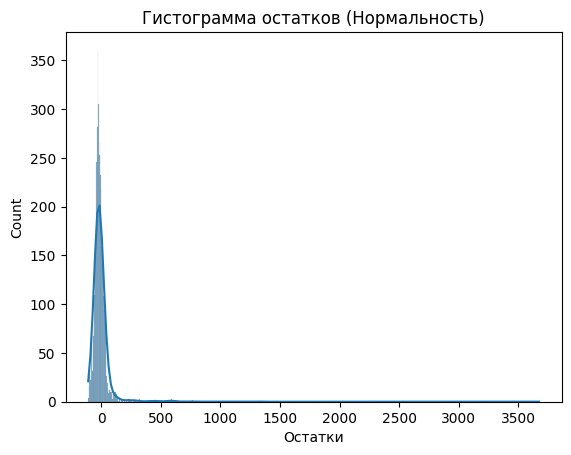

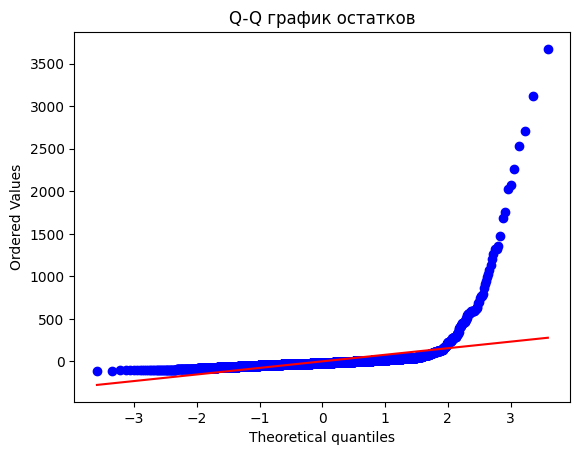

In [73]:
residuals = res.resid
sns.histplot(residuals, kde=True)
plt.title("Гистограмма остатков (Нормальность)")
plt.xlabel("Остатки")
plt.show()

probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q график остатков")
plt.show()

**ЗАДАНИЕ: Чему равен R-squared модели?**

In [79]:
df1['n_terror_attack'].corr(df1['femaleLF']) ** 2

0.04051456491537347